In [1]:
from PIL import Image

In [2]:
img =Image.open("/home/ubuntu/2020_1/cap/video/test/frame35.jpg")
img
time=img.crop((620,48,680,70))
time

In [21]:
time=img.crop((600,40,700,70))
time

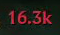

In [174]:
t_b=img.crop((1000,110,1040,160))
t_b


time=img.crop(())
#t_b.save('')

In [187]:
g_b=img.crop((760,10,820,50))
g_b
g_r=img.crop((1140,10,1200,45))
g_r
time=img.crop((930,70,1000,100))
time


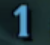

In [144]:
k_b=img.crop((1380,120,1430,165))
k_b

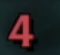

In [145]:
k_r=img.crop((1480,110,1540,165))
k_r

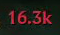

In [173]:

#g_r.convert("L")
#g_r.convert("L").save('gold_crop.png')


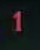

In [241]:
t_r=img.crop((1890,110,1930,160))
t_r

In [150]:
status=img.crop((1090,420,1800,480))

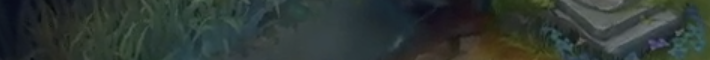

In [151]:
status

In [249]:
import io
import os
from google.cloud import vision
from google.cloud.vision import types
os.environ['GOOGLE_APPLICATION_CREDENTIALS']="/home/ubuntu/2020_1/cap/google_hyein.json"

def image_to_byte_array(image:Image):
    imgbyteArr=io.BytesIO()
    image.save(imgbyteArr,format='PNG')
    imgbyteArr=imgbyteArr.getvalue()
    return imgbyteArr
def crop_image(img):
    t_b=img.crop((1000,110,1040,160))
    t_b=image_to_byte_array(t_b)
    
    g_b=img.crop((1135,115,1240,160))
    g_b=image_to_byte_array(g_b)
    
    k_b=img.crop((1380,120,1430,165))
    k_b=image_to_byte_array(k_b)
    
    k_r=img.crop((1480,110,1540,165))
    k_r=image_to_byte_array(k_r)
    
    g_r=img.crop((1700,110,1800,160))
    g_r=image_to_byte_array(g_r)
    
    t_r=img.crop((1890,110,1930,160))
    t_r=image_to_byte_array(t_r)
    
    status=img.crop((1090,420,1800,480))
    status=image_to_byte_array(status)
    
    replay=img.crop((100,100,400,300))
    replay=image_to_byte_array(replay)
    return t_b, g_b,k_b,k_r,g_r,t_r,status,replay

def vision_api(file_name):
    client=vision.ImageAnnotatorClient()
    img =Image.open(file_name)
    
    t_b, g_b,k_b,k_r,g_r,t_r,status,replay=crop_image(img)
    dash_list=[t_b, g_b,k_b,k_r,g_r,t_r,status,replay]
    name_list=["tower_blue","gold_blue","kill_blue","kill_red","gold_red","tower_red","status","replay"]
    text_list={}
    for idx,imgbyteArr in enumerate(dash_list):
        image=types.Image(content=imgbyteArr)
        response=client.document_text_detection(image=image)
        texts=response.text_annotations
        try:
            text_list[name_list[idx]]=(texts[0].description.strip()).lower()
        except:
            text_list[name_list[idx]]=''
        """
        for i,text in enumerate(texts):
            print('\n" : {}"'.format(text.description))
            if i==0:
                text_list[name_list[idx]]=text.description[:-1]
        """
        

        if response.error.message:
            raise Exception(
                '{}\nFor more info on error messages, check: '
                'https://cloud.google.com/apis/design/errors'.format(
                    response.error.message))
        
    print(text_list)
    return score_cal(text_list)
        
def score_cal(text_list):
    name_list=["tower_blue","gold_blue","kill_blue","kill_red","gold_red","tower_red","status","replay"]
    score_list={}
    if "REPLAY" in text_list['replay']:
        score_list['replay']=True
    else:
        score_list['replay']=False
        ######t_b
        try:
            t_b=text_list['tower_blue'].replace('о','0')
            score_list['tower_blue']=int(t_b)
        except:
            print("can not recognize tower_blue")
            score_list['tower_blue']=0

        ######g_b
        try:
            g_b=text_list['gold_blue'].replace(',','.')
            score_list['gold_blue']=float(g_b[:-1])#k 제거
        except:
            print("can not recognize gold_blue")
            score_list['gold_blue']=0
        
        ######k_b
        try:
            k_b=text_list['kill_blue'].replace('о','0')        
            score_list['kill_blue']=int(k_b)
        except:
            print("can not recognize kill_blue")
            score_list['kill_blue']=0

        
        ######k_r
        try:
            k_r=text_list['kill_red'].replace('о','0')        
            score_list['kill_red']=int(k_r) 
        except:
            print("can not recognize kill_red")
            score_list['kill_red']=0
        
        ######g_r
        try:
            g_r=text_list['gold_red'].replace(',','.')
            score_list['gold_red']=float(g_r[:-1])#k 제거
        except:
            print("can not recognize gold_red")
            score_list['gold_red']=0
        
        ######tower_red
        try:
            t_r=text_list['tower_red'].replace('о','0')
            score_list['tower_red']=int(t_r)    
        except:
            print("can not recognize tower_red")
            score_list['tower_red']=0
        
        ######status
        status=[]
        if "dragon" in status:
            status=[1,0]
            score_list['status']=status
        elif "baron" in status:
            status=[0,1]
            score_list['status']=status
        else:
            status=[0,0]
            score_list['status']=status   
    return score_list
vision_api('dragon-4.png')

{'tower_blue': 'о', 'gold_blue': '22.7k', 'kill_blue': '2', 'kill_red': '6', 'gold_red': '26.4k', 'tower_red': '', 'status': 'red team has slain the dragon!', 'replay': '5:00'}
can not recognize tower_red
{'replay': False, 'tower_blue': 0, 'gold_blue': 22.7, 'kill_blue': 2, 'kill_red': 6, 'gold_red': 26.4, 'tower_red': 0, 'status': [0, 0]}


{'replay': False,
 'tower_blue': 0,
 'gold_blue': 22.7,
 'kill_blue': 2,
 'kill_red': 6,
 'gold_red': 26.4,
 'tower_red': 0,
 'status': [0, 0]}

In [41]:
imgbyteArr

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x1a\x00\x00\x00\x19\x08\x06\x00\x00\x00/\xde>`\x00\x00\x0cEiCCPICC Profile\x00\x00x\x9c\x95W\x07TS\xc9\x1a\x9e[RIh\x81\x08H\t\xbd\x89"\xbdH\t\xa1E\x10\x90*\xd8\x08I \xa1\xc4\x98\x10D\xec\xca\xa2\x82k\x17\x11\xb0\xa1\xab"\x8a\xae\x05\x90\xb5b/\x8bb\xef\x0f\x0b*\xca\xbaX\xb0\xa1\xf2&\x05t\xf5\xbc\xf7\xce\xfb\xcf\x99;_\xfe\xf9\xe7\xfbK\xe6\xce\x9d\x01@\xa7\x9a\'\x95\xe6\xa2\xba\x00\xe4I\xf2e\xf1\x11!\xac1\xa9i,\xd2c\x80\x02\x1cP\x81\x0e@y|\xb9\x94\x1d\x17\x17\r\xa0\xf4\xf7\xff\x94w\xd7\x01\xa2\xec\xaf\xb8(\xb9~\x1e\xff\xaf\xa2\'\x10\xca\xf9\x00 q\x10g\x08\xe4\xfc<\x88\xf7\x01\x80\x17\xf3\xa5\xb2|\x00\x88>Po=%_\xaa\xc4\xe3 6\x90\xc1\x00!\x96*q\x96\x1a\x17+q\x86\x1aW\xa8l\x12\xe39\x10\xef\x00\x80L\xe3\xf1dY\x00h7A=\xab\x80\x9f\x05y\xb4oB\xec*\x11\x88%\x00\xe8\x90!\x0e\xe4\x8bx\x02\x88#!\x1e\x92\x977I\x89\xa1\x1dp\xc8\xf8\x8e\'\xeb\x1f\x9c\x19\x03\x9c<^\xd6\x00V\xe7\xa2\x12r\xa8X.\xcd\xe5M\xfd?\xcb\xf1\xbf%/W\xd1\xef\xc3\x0e6\x9aH\x16\x19\xaf

In [82]:
img =Image.open("dragon-4.png")
img2=img.crop((1000,110,1030,160))
img2

In [245]:
img=image_to_byte_array(t_r.convert("L"))


In [246]:
client=vision.ImageAnnotatorClient()
image=types.Image(content=img)
response=client.document_text_detection(image=image)
texts=response.text_annotations
print(texts[0].description.strip())

if response.error.message:
    raise Exception(
        '{}\nFor more info on error messages, check: '
        'https://cloud.google.com/apis/design/errors'.format(
            response.error.message))

IndexError: list index (0) out of range

In [24]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r'/usr/bin/tesseract'
print(pytesseract.image_to_string(time))

Ca


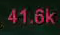

In [154]:
import os
img =Image.open("/home/ubuntu/gangmin/frame/frame3395.jpg")
g_b=img.crop((760,10,820,50))
g_b_new=g_b.convert("L").resize((g_b.size[0]*5,g_b.size[1]*5))
g_r=img.crop((1140,10,1200,45))

#g_b.convert("L").save('gold_crop.png')
#os.system("convert gold_crop.png -resize 500% gold_r2.png ")
g_r

In [121]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r'/usr/bin/tesseract'
print(pytesseract.image_to_string(thresh))

’ Qs a

C2

ares Ny ate
020 LOL PRO LEAGUE SPRIN
gflearnn a7

——

RAS SARS
g[rasea, 8 Co ape ee

afd re 23 Te) fe [oo eas 7
RECS SB | 00 |

i

 

e —__

fe!


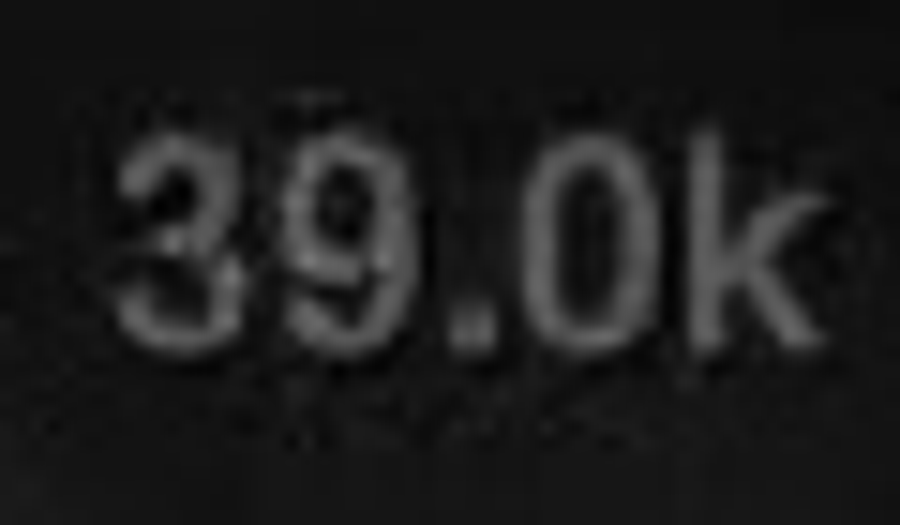

In [76]:
g_r=img.crop((1140,10,1200,45))
g_r_new=g_r.convert("L").resize((g_r.size[0]*15,g_r.size[1]*15))
g_r_new

In [37]:
g_new=g_b.convert("L").resize((105*5,45*5))

In [38]:
pytesseract.image_to_string(g_new)

'22.7k'

In [207]:
from PIL import Image
import pytesseract
import csv
pytesseract.pytesseract.tesseract_cmd=r'/usr/bin/tesseract'

def image_ocr(image):
    img =Image.open(image)
    g_b=img.crop((760,10,820,50))
    g_r=img.crop((1140,10,1200,45))
    g_b_new=g_b.resize((g_b.size[0]*5,g_b.size[1]*5))
    g_r_new=g_r.resize((g_r.size[0]*5,g_r.size[1]*5))
    time=img.crop((930,70,1000,100))
    time_new=time.resize((time.size[0]*5,time.size[1]*5))
    
    g_b_new.save('./g_b_r.png')
    g_r_new.save('./g_r_r.png')
    time_new.save('./time_r.png')
    
    img1 = cv2.imread('./g_b_r.png',cv2.IMREAD_GRAYSCALE)
    thresh1 = cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    #thresh1 = cv2.Canny(np.uint8(img1 * 255), 50, 100)

    img2 = cv2.imread('./g_r_r.png',cv2.IMREAD_GRAYSCALE)
    thresh2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    #thresh2 = cv2.Canny(np.uint8(img2 * 255), 50, 100)

    img3 = cv2.imread('./time_r.png',cv2.IMREAD_GRAYSCALE)
    #thresh3 = cv2.Canny(np.uint8(img3 * 255), 50, 100)

    thresh3 = cv2.threshold(img3, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    g_b_text=pytesseract.image_to_string(thresh1)
    g_r_text=pytesseract.image_to_string(thresh2)
    time_text=pytesseract.image_to_string(thresh3)

    #print("Gold_blue :",g_b_text," Gold_Red : ",g_r_text)
    return {"gold_blue":g_b_text,"gold_red":g_r_text,"time":time_text}
image_ocr("/home/ubuntu/gangmin/frame2/frame35.jpg")

{'gold_blue': '16.4k', 'gold_red': '16.3k', 'time': '10:40'}

In [191]:

for i in range(3300,3400):
    file_name='/home/ubuntu/gangmin/frame/frame{}.jpg'.format(i)
    image_ocr(file_name)
    with open('gold_ocr2.csv', 'a', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=['gold_blue','gold_red','time'])
        writer.writerow(image_ocr(file_name))

In [113]:
import cv2
import numpy as np

In [146]:
img = cv2.imread('./',cv2.IMREAD_GRAYSCALE)
thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

SystemError: <built-in function imread> returned NULL without setting an error

In [128]:
import io
g_b.convert("L")

def image_to_byte_array(image:Image):
    imgbyteArr=io.BytesIO()
    image.save(imgbyteArr,format='PNG')
    imgbyteArr=imgbyteArr.getvalue()
result=image_to_byte_array(g_b)

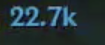

In [145]:
g_b

In [4]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r'/usr/bin/tesseract'
#print(pytesseract.image_to_string(thresh))

NameError: name 'thresh' is not defined

In [39]:
img =Image.open("/home/ubuntu/2020_1/cap/video/test/frame380.jpg")
time=img.crop((650,40,700,70))

time_new=time.resize((time.size[0]*5,time.size[1]*5))

time_new.save('./time_r.png')
img1 = cv2.imread('./time_r.png',cv2.IMREAD_GRAYSCALE)
thresh1 = cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
"""
dst = cv2.cornerHarris(img1, 9, 3, 0.01)
dst = cv2.dilate(dst, None)
ret, dst = cv2.threshold(dst, 0.001 * dst.max(), 1, 0)
dst = np.uint8(dst)
"""
#edges = cv2.Canny(np.uint8(img1 * 255), 50, 100)


print(pytesseract.image_to_string(thresh1))

In [40]:
time

In [3]:
import cv2
import numpy as np

for i in range(476):
    img =Image.open("/home/ubuntu/2020_1/cap/video/test/frame{}.jpg".format(i))
    time=img.crop((620,48,680,70))

    time_new=time.resize((time.size[0]*5,time.size[1]*5))

    time_new.save('./time_r.png')
    img1 = cv2.imread('./time_r.png',cv2.IMREAD_GRAYSCALE)
    thresh1 = cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    """
    dst = cv2.cornerHarris(img1, 9, 3, 0.01)
    dst = cv2.dilate(dst, None)
    ret, dst = cv2.threshold(dst, 0.001 * dst.max(), 1, 0)
    dst = np.uint8(dst)
    """
    #edges = cv2.Canny(np.uint8(img1 * 255), 50, 100)

    
    print('{} : '.format(i)+pytesseract.image_to_string(thresh1))

NameError: name 'pytesseract' is not defined

In [29]:
time

In [6]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r'/usr/bin/tesseract'
import cv2
import numpy as np

In [64]:
import cv2
import numpy as np

for i in range(476):
    img =Image.open("/home/ubuntu/2020_1/cap/video/test/frame{}.jpg".format(i))
    time=img.crop((630,50,660,63))

    time_new=time.resize((time.size[0]*5,time.size[1]*5))

    time_new.save('./time_r.png')
    img1 = cv2.imread('./time_r.png',cv2.IMREAD_GRAYSCALE)
    thresh1 = cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    """
    dst = cv2.cornerHarris(img1, 9, 3, 0.01)
    dst = cv2.dilate(dst, None)
    ret, dst = cv2.threshold(dst, 0.001 * dst.max(), 1, 0)
    dst = np.uint8(dst)
    """
    #edges = cv2.Canny(np.uint8(img1 * 255), 50, 100)

    
    print('{} : '.format(i)+pytesseract.image_to_string(thresh1))

0 : 
1 : 
2 : 
3 : 
4 : 
5 : 
6 : 
7 : 
8 : 
9 : 
10 : 
11 : US
12 : US
13 : US
14 : 
15 : 
16 : td
17 : UT
18 : UT
19 : tS
20 : US
21 : 07:41
22 : 07:42
23 : 07:43
24 : 07:44
25 : 07:45
26 : 07:46
27 : 07:47
28 : 07:48
29 : 07:49
30 : 07:50
31 : 07:51
32 : 07:52
33 : 07:53
34 : 07:54
35 : 07:55
36 : 07:55
37 : 07:56
38 : 07:57
39 : 07:58
40 : 07:59
41 : 08:00
42 : 08:01
43 : 08:02
44 : 08:03
45 : 08:04
46 : 08:05
47 : 08:06
48 : 08:07
49 : 08:08
50 : 08:09
51 : 08:10
52 : 08:11
53 : 08:12
54 : 06:16
55 : 10:11
56 : 10:12
57 : 10:13
58 : 10:14
59 : 10:15
60 : 10:16
61 : 10:17
62 : 10:18
63 : 10:19
64 : 10:20
65 : 10:20
66 : 10:21
67 : 10:22
68 : 10:23
69 : 10:24
70 : 10:25
71 : 10:26
72 : 10:27
73 : 10:28
74 : 10:29
75 : 10:30
76 : 10:31
77 : 10:32
78 : 10:33
79 : 10:34
80 : 10:35
81 : 10:36
82 : 10:37
83 : 10:38
84 : 10:39
85 : 10:40
86 : 10:41
87 : 10:41
88 : 10:42
89 : 10:43
90 : 10:44
91 : 12:49
92 : 12:50
93 : 12:51
94 : 12:52
95 : 
96 : 12:54
97 : 12:55
98 : 12:56
99 : 12:57
100 

In [59]:
img =Image.open("/home/ubuntu/2020_1/cap/video/test/frame422.jpg")
time=img.crop((630,50,660,63))

time_new=time.resize((time.size[0]*10,time.size[1]*10))

time_new.save('./time_r.png')
img1 = cv2.imread('./time_r.png',cv2.IMREAD_GRAYSCALE)
thresh1 = cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

In [61]:
img = Image.fromarray(thresh1)

In [63]:
pytesseract.image_to_string(thresh1)

'37:57'

In [28]:
img =Image.open("/home/ubuntu/2020_1/cap/video/test/frame211.jpg")
time=img.crop((625,48,665,65))

In [60]:
time